# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1>1. GBDT (xgboost/lightgbm) </h1>

In [ ]:
#importing libaries
!pip install chart_studio

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

# import chart_studio.plotly as plotly
# import plotly.graph_objs as go

# #from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
# from collections import Counter

import nltk
# nltk.download('all')
#import nltk
nltk.downloader.download('vader_lexicon')
#python > import nltk > nltk.download() > d > vader_lexicon

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## 1.1 Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas
path_dir = '/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/9_Apply Decision Trees on Donors Choose dataset/preprocessed_data.csv'
data = pandas.read_csv(path_dir, nrows = 35000)

In [5]:
data.shape

(35000, 9)

In [6]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [7]:
type(y), len(y), y[0:10], np.unique(y)

(numpy.ndarray, 35000, array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1]), array([0, 1]))

In [8]:
#data is highly imbalanced 
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 5371, 1: 29629}

    observation: Data is highly imbalanced 

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [10]:
X_train.shape, X_test.shape

((23450, 8), (11550, 8))

In [11]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 3599, 1: 19851}

In [12]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1772, 1: 9778}

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [13]:
print("Before vectorizations") 
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)
print("="*100)
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=500)  # max_features=5000

# encoding eassay
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values) 
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After TFIDF vectorization of essay") 
print(X_train_essay_tfidf.shape, y_train.shape) 
print(X_test_essay_tfidf.shape, y_test.shape) 
print("="*100)

Before vectorizations
(23450, 8) (23450,)
(11550, 8) (11550,)
After TFIDF vectorization of essay
(23450, 500) (23450,)
(11550, 500) (11550,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [14]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.fit_transform(X_test['price'].values.reshape (1,-1))
X_train_price_norm =X_train_price_norm.reshape(-1,1) 
X_test_price_norm = X_test_price_norm.reshape(-1,1)
print("After vectorizations") 
#print(X_train_price_norm_1.shape, y_train.shape) 
print(X_train_price_norm.shape, y_train.shape) 
print(X_test_price_norm.shape, y_test.shape) 
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [15]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample. 
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1) 
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
print("After vectorizations") 
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape) 
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sentiment_neg, sentiment_neu, sentiment_pos, sentiment_comp = [], [], [], []

for sentence in tqdm(data['essay'].values):
  sid = SIA()
  sentiment_dict=sid.polarity_scores(sentence)
  sentiment_neg.append(sentiment_dict['neg'])
  sentiment_neu.append(sentiment_dict['neu'])
  sentiment_pos.append(sentiment_dict['pos'])
  sentiment_comp.append(sentiment_dict['compound'])

100%|██████████| 35000/35000 [04:26<00:00, 131.46it/s]


In [17]:
import numpy as np
neg = np.array((sentiment_neg))
pos = np.array((sentiment_pos))
neu = np.array((sentiment_neu))
comp = np.array((sentiment_comp))

In [18]:
X_train_neg   = neg[0:X_train.shape[0]].reshape(-1,1) 
X_train_pos   = pos[0:X_train.shape[0]].reshape(-1,1) 
X_train_comp  = comp[0:X_train.shape[0]].reshape(-1,1) 
X_train_neu   = neu[0:X_train.shape[0]].reshape(-1,1) 

In [19]:
X_test_neg   = neg[X_train.shape[0]:].reshape(-1,1) 
X_test_pos   = pos[X_train.shape[0]:].reshape(-1,1) 
X_test_comp  = comp[X_train.shape[0]:].reshape(-1,1) 
X_test_neu   = neu[X_train.shape[0]:].reshape(-1,1) 

In [20]:
#https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining
def mask(df, key, value):
    return df[df[key] == value]

def get_response(data,data_label):
    cat_values = np.unique(data).tolist()
    df = pd.DataFrame({'feature':data.tolist(),'label':data_label.tolist()})
    pd.DataFrame.mask = mask
    
    accep = {}
    reject={}
    prob_neg = {}
    prob_pos={}
    
    for i in cat_values:
        count_0     = len(df.mask('feature', i).mask('label', 0))
        count_1     = len(df.mask('feature', i).mask('label', 1))
        total       = count_0 + count_1
        prob_0      = count_0/total
        prob_1      = count_1/total
        accep[i]    = count_1
        reject[i]   = count_0
        prob_neg[i] = prob_0
        prob_pos[i] = prob_1
        
    return prob_neg, prob_pos

In [21]:
def dict2list(data_x,data_y,cat_feat):
    features_neg = []
    features_pos = []
    cat_0_train = get_response(data_x[cat_feat],data_y)[0]
    cat_1_train = get_response(data_x[cat_feat],data_y)[1]
    for i in data_x[cat_feat]:
        features_neg.append(cat_0_train[i])
        features_pos.append(cat_1_train[i])
    res_neg = np.array(features_neg).reshape(-1,1)
    res_pos = np.array(features_pos).reshape(-1,1)
    return res_pos, res_neg

In [22]:
#categorical train data
cat_pos_train, cat_neg_train  = dict2list(X_train, y_train, 'clean_categories')
subcat_pos_train , subcat_neg_train   = dict2list(X_train, y_train, 'clean_subcategories')
state_pos_train , state_neg_train    = dict2list(X_train, y_train, 'school_state')
prefix_pos_train  , prefix_neg_train    = dict2list(X_train, y_train, 'teacher_prefix')
grade_pos_train  , grade_neg_train    = dict2list(X_train, y_train, 'project_grade_category')


In [23]:
def dict2list(data_x,data_y,cat_feat):
    features_neg = []
    features_pos = []
    cat_0_test = get_response(data_x[cat_feat],data_y)[0]
    cat_1_test = get_response(data_x[cat_feat],data_y)[1]
    for i in data_x[cat_feat]:
        if i in cat_0_test.keys():
            features_neg.append(cat_0_test[i])
            features_pos.append(cat_0_test[i])
        elif i in cat_1_test.keys():
            features_neg.append(cat_0_test[i])
            features_pos.append(cat_0_test[i])
        else:
            features_neg.append(0.5)
            features_pos.append(0.5)                       
    res_neg = np.array(features_neg).reshape(-1,1)
    res_pos = np.array(features_pos).reshape(-1,1)
    return res_pos, res_neg

In [24]:
cat_pos_test_a, cat_neg_test_a     = dict2list(X_test, y_test, 'clean_categories')
subcat_pos_test, subcat_neg_test      = dict2list(X_test, y_test, 'clean_subcategories')
state_1_test, state_0_test      = dict2list(X_test, y_test, 'school_state')
prefix_1_test, prefix_0_test       = dict2list(X_test, y_test, 'teacher_prefix')
grad_cat_1_test, grad_cat_0_test    = dict2list(X_test, y_test, 'project_grade_category')

In [25]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, cat_neg_train, cat_pos_train, grade_neg_train, grade_pos_train, prefix_neg_train, prefix_pos_train, state_neg_train, state_pos_train, subcat_neg_train, subcat_pos_train, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_neg, X_train_pos, X_train_comp, X_train_neu)).tocsr()
X_te = hstack((X_test_essay_tfidf, cat_neg_test_a, cat_pos_test_a, grad_cat_0_test,grad_cat_1_test, prefix_0_test, prefix_1_test, subcat_neg_test, 
               subcat_pos_test, state_0_test, state_1_test, X_test_price_norm,
               X_test_teacher_number_of_previously_posted_projects_norm, X_test_neg, X_test_pos, X_test_comp, X_test_neu)).tocsr()
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_te.shape, y_test.shape) 
print("="*100)

Final Data matrix
(23450, 516) (23450,)
(11550, 516) (11550,)


# Hyper-parameter Tuning

In [26]:
#RandomizedSearchCV

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

gbdt = LGBMClassifier(is_unbalance = True)

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] 
n_estimators  = [5, 10, 50, 75, 100, 200]

#grid_params = {'n_estimators': [100, 200, 500, 1000], 'max_depth':[1, 5, 10, 50]}
grid_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators':[5,10,50, 75, 100, 200]}

rs = RandomizedSearchCV(gbdt, grid_params, cv=3, scoring='roc_auc', return_train_score=True)

rs.fit(X_tr, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(is_unbalance=True),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3],
                                        'n_estimators': [5, 10, 50, 75, 100,
                                                         200]},
                   return_train_score=True, scoring='roc_auc')

In [27]:
rs.cv_results_

{'mean_fit_time': array([4.25212502, 0.1977218 , 2.94230819, 3.54632711, 0.19568507,
        1.64458474, 0.29746071, 3.44826086, 1.20605421, 0.31624802]),
 'std_fit_time': array([1.53642258, 0.0070965 , 1.66846673, 1.13783201, 0.00537488,
        0.44881291, 0.00468409, 1.05844623, 0.01620477, 0.00849386]),
 'mean_score_time': array([0.01501377, 0.00526714, 0.01000595, 0.010746  , 0.0051829 ,
        0.00940045, 0.00563725, 0.01472322, 0.00716297, 0.00493344]),
 'std_score_time': array([0.00068691, 0.00021809, 0.00050699, 0.00091195, 0.00013441,
        0.00099006, 0.00024708, 0.00428615, 0.00012268, 0.00014985]),
 'param_n_estimators': masked_array(data=[200, 5, 75, 100, 5, 75, 10, 100, 50, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.3, 0.3, 0.01, 0.001, 0.1, 0.3, 0.2, 0.01, 0.001,
                    0.0001],
        

In [28]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])
rs.estimator

Best score:  0.7067858337567338
k value with best score:  {'n_estimators': 100, 'learning_rate': 0.01}
Train AUC scores
[1.         0.80692413 0.82866187 0.76246325 0.78744088 0.99850498
 0.84911725 0.84113703 0.74416873 0.70846294]
CV AUC scores
[0.67075741 0.67910996 0.70281734 0.67560072 0.68454348 0.67722779
 0.69926648 0.70678583 0.66527557 0.63845303]


LGBMClassifier(is_unbalance=True)

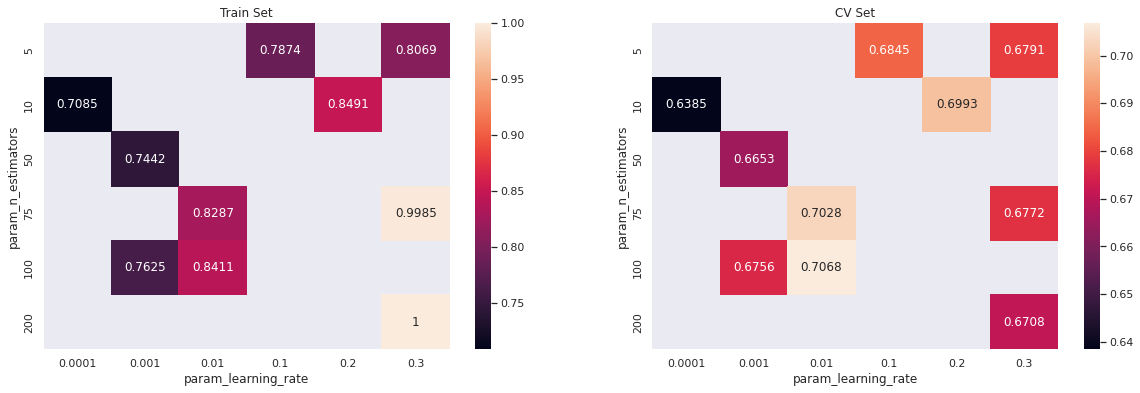

In [29]:
#ref: https://github.com/enviz/donors-choose_RandomForest_GBDT/blob/master/9_DonorsChoose_RF_GBDT.ipynb

import seaborn as sns
sns.set()
max_scores_1 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_learning_rate']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores_1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores_1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

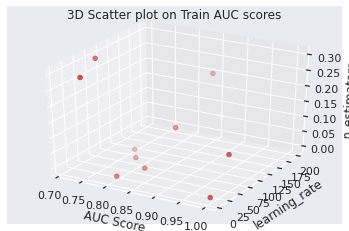

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def scatter_plot(model,mean,n_est,lr,title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    g1 = list(model.cv_results_[mean])     #Train AUC Score
    g2 = n_est # n_estimators
    g3 = lr  # learning rate

    ax.scatter(g1, g2, g3, c='r', marker='o')

    ax.set_xlabel('AUC Score')
    ax.set_ylabel('learning_rate')
    ax.set_zlabel('n_estimators')

    plt.title('3D Scatter plot on %s AUC scores'%title)
    plt.show()

#Plotting a scatter plot of  mean-train-score
n_est = [5, 10, 50,    100,   75, 50, 100,   200,    5,  75] # n_estimators
lr = [0.0001, 0.0001, 0.0001, 0.0001,     0.001, 0.1, .1,     .2,  .3, .3]# learning rate
scatter_plot(rs,'mean_train_score',n_est,lr,'Train')

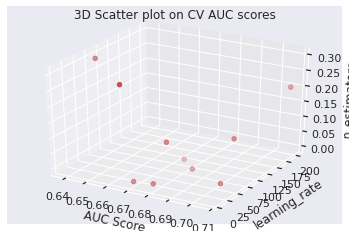

In [31]:
#Plotting a scatter plot of  mean-test-score
scatter_plot(rs,'mean_test_score',n_est,lr,'CV')


In [32]:
learning_rate = rs.best_params_['learning_rate']
num_estimators = rs.best_params_['n_estimators']

In [33]:
learning_rate, num_estimators

(0.01, 100)

In [34]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    # print(len(clf.predict_proba(data)), type(clf.predict_proba(data)),clf.predict_proba(data))
    return y_pred

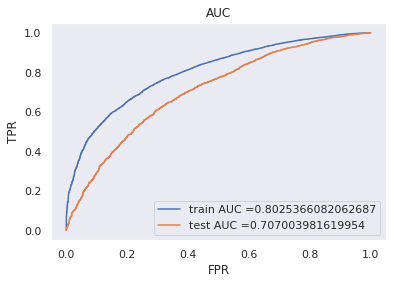

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = LGBMClassifier(learning_rate= learning_rate, n_estimators = num_estimators, class_weight=None, is_unbalance = True)

model.fit(X_tr,y_train)
    
y_train_pred = pred_prob(model,X_tr)
y_test_pred = pred_prob(model,X_te)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()



In [36]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [37]:
#creating Confusion Matrix function 
#Reference: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#fmt='g' reason: https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
from sklearn.metrics import confusion_matrix

def get_ConfusionMatrix(svm, test_data, y_true):
    y_pred = svm.predict(test_data)
    
    cal_cm = confusion_matrix(y_true, y_pred) # Predicted values are column wise!
    ax = plt.subplot()
    sns.heatmap(cal_cm, annot=True, ax=ax, fmt='g')
    
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('Actual Labels')
    # ax.set_title('Confusion Matrix using %s on text features'%title)
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])



In [39]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5290311402891246 for threshold 0.621
Train confusion matrix
[[ 2688   911]
 [ 5790 14061]]


Train data Confusion matrix 


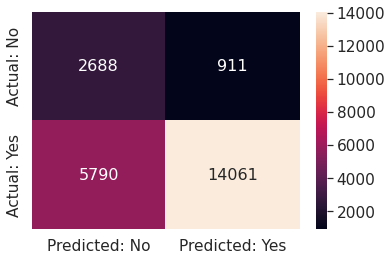

In [40]:
#creating Confusion Matrix function 
#Reference: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#fmt='g' reason: https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
from sklearn.metrics import confusion_matrix

def get_ConfusionMatrix(y_true,y_pred, best_t):
    
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, predict_with_best_t(y_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 16}, fmt='g')

print("Train data Confusion matrix ")
get_ConfusionMatrix(y_train, y_train_pred,best_t)



In [41]:
print("Test data confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test data confusion matrix
[[1128  644]
 [3218 6560]]


Test data confusion matrix


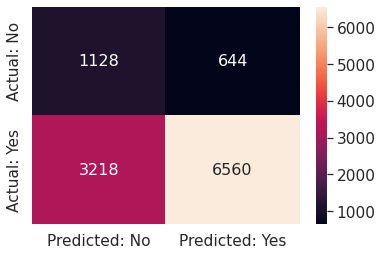

In [42]:
print("Test data confusion matrix")
get_ConfusionMatrix(y_test, y_test_pred,best_t)

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

GBDT with TFIDF W2V

In [43]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/9_Apply Decision Trees on Donors Choose dataset/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [44]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

# encoding eassay
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values) 
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After TFIDF vectorization of essay") 
print(X_train_essay_tfidf.shape, y_train.shape) 
print(X_test_essay_tfidf.shape, y_test.shape) 
print("="*100)

After TFIDF vectorization of essay
(23450, 5000) (23450,)
(11550, 5000) (11550,)


In [45]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [46]:
#ref: https://github.com/enviz/donors-choose_RandomForest_GBDT/blob/master/9_DonorsChoose_RF_GBDT.ipynb
#ref: applied ai 
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 23450/23450 [00:51<00:00, 452.32it/s]

23450
300


In [47]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 11550/11550 [00:24<00:00, 463.93it/s]

11550
300


In [48]:
len(train_tfidf_w2v_essays),len(test_tfidf_w2v_essays)

(23450, 11550)

In [49]:
train_tfidf_w2v_essays1 = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays1 = np.array(test_tfidf_w2v_essays)

In [50]:
from scipy.sparse import coo_matrix, hstack 

In [51]:
# train_tfidf_w2v_essays1 = coo_matrix(train_tfidf_w2v_essays1)
def conv2coo_matrix(lst_X):
    coo_matrix_ = []
    for lst in lst_X:
        coo_matrix_.append(coo_matrix(lst))
    return tuple(coo_matrix_)


X_tr = [train_tfidf_w2v_essays1, cat_neg_train, cat_pos_train, grade_neg_train, grade_pos_train, prefix_neg_train, 
               prefix_pos_train, state_neg_train, state_pos_train, subcat_neg_train, subcat_pos_train, X_train_price_norm, 
               X_train_teacher_number_of_previously_posted_projects_norm, X_train_neg, X_train_pos, X_train_comp, X_train_neu]



X_tr_coo_matrix = conv2coo_matrix(X_tr)

X_te = [test_tfidf_w2v_essays1, cat_neg_test_a, cat_pos_test_a, grad_cat_0_test,grad_cat_1_test, prefix_0_test, prefix_1_test, subcat_neg_test, 
               subcat_pos_test, state_0_test, state_1_test, X_test_price_norm,
               X_test_teacher_number_of_previously_posted_projects_norm, X_test_neg, X_test_pos, X_test_comp, X_test_neu]

X_te_coo_matrix = conv2coo_matrix(X_te)


X_tr = hstack((X_tr_coo_matrix)).tocsr()
X_te = hstack((X_te_coo_matrix)).tocsr()

print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_te.shape, y_test.shape) 
print("="*100)


Final Data matrix
(23450, 316) (23450,)
(11550, 316) (11550,)


In [ ]:
# from scipy.sparse import hstack
# X_tr = hstack((coo_matrix(train_tfidf_w2v_essays1), cat_neg_train, cat_pos_train, grade_neg_train, grade_pos_train, prefix_neg_train, 
#                prefix_pos_train, state_neg_train, state_pos_train, subcat_neg_train, subcat_pos_train, X_train_price_norm, 
#                X_train_teacher_number_of_previously_posted_projects_norm, X_train_neg, X_train_pos, X_train_comp, X_train_neu)).tocsr()
# X_te = hstack((coo_matrix(test_tfidf_w2v_essays1), cat_neg_test_a, cat_pos_test_a, grad_cat_0_test,grad_cat_1_test, prefix_0_test, prefix_1_test, subcat_neg_test, 
#                subcat_pos_test, state_0_test, state_1_test, X_test_price_norm,
#                X_test_teacher_number_of_previously_posted_projects_norm, X_test_neg, X_test_pos, X_test_comp, X_test_neu)).tocsr()
# print("Final Data matrix") 
# print(X_tr.shape, y_train.shape) 
# print(X_te.shape, y_test.shape) 
# print("="*100)

In [52]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

rf = LGBMClassifier(is_unbalance=True)

#grid_params = {'n_estimators': [100, 200, 500, 1000], 'max_depth':[1, 5, 10, 50]}
grid_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators':[5,10,50, 75, 100, 200]}
 
rs = RandomizedSearchCV(rf,grid_params ,cv=3, scoring='roc_auc', return_train_score=True, random_state=100)
rs.fit(X_tr, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(is_unbalance=True),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3],
                                        'n_estimators': [5, 10, 50, 75, 100,
                                                         200]},
                   random_state=100, return_train_score=True,
                   scoring='roc_auc')

In [53]:
print('Best score: ',rs.best_score_)
print('k value with best score: ',rs.best_params_)
print('='*75)
print('Train AUC scores')
print(rs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(rs.cv_results_['mean_test_score'])

Best score:  0.687191548208045
k value with best score:  {'n_estimators': 10, 'learning_rate': 0.1}
Train AUC scores
[0.70308732 0.84307908 0.99601257 1.         0.73188388 0.76449171
 0.99999957 0.99972758 0.74684994 0.70493503]
CV AUC scores
[0.62009287 0.68719155 0.67621924 0.67001426 0.63949932 0.65864571
 0.68648666 0.67386948 0.64662176 0.62155126]


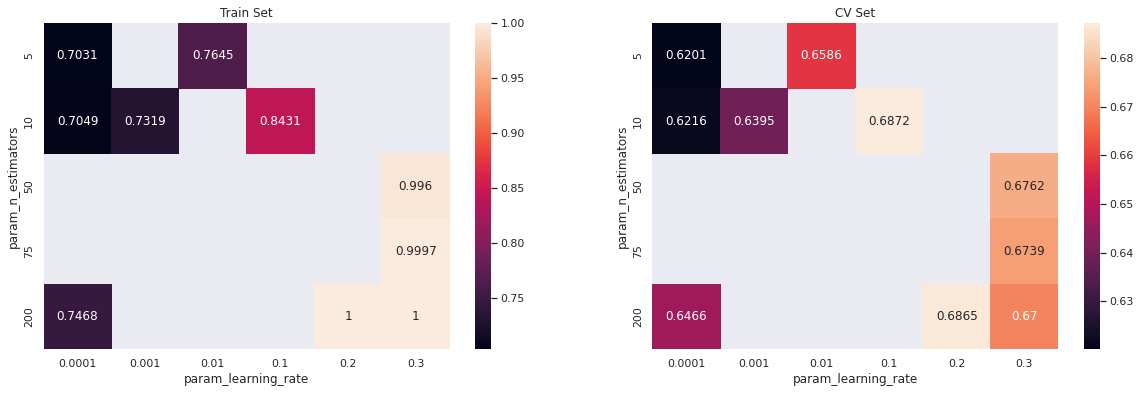

In [54]:
#https://github.com/enviz/donors-choose_RandomForest_GBDT/blob/master/9_DonorsChoose_RF_GBDT.ipynb
import seaborn as sns; sns.set()
max_scores_2 = pd.DataFrame(rs.cv_results_).groupby(['param_n_estimators', 'param_learning_rate']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores_2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores_2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

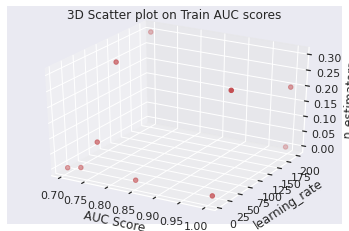

In [55]:
n_est = [5, 10, 200, 10, 5, 10, 200, 50, 75, 200] # n_estimaters
lr = [0.0001, 0.0001, 0.0001, 0.001, 0.01, 0.1, .2, .3, .3, .3]              # learning rate
scatter_plot(rs,'mean_train_score',n_est,lr,'Train')

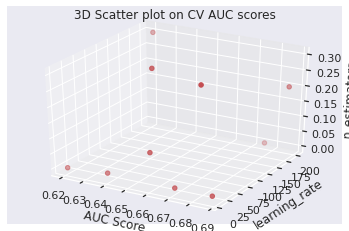

In [56]:

n_est = [5, 10, 200, 10, 5, 10, 200, 50, 75, 200] # n_estimaters
lr = [0.0001, 0.0001, 0.0001, 0.001, 0.01, 0.1, .2, .3, .3, .3]              # learning rate

scatter_plot(rs,'mean_test_score',n_est,lr,'CV')

In [57]:
learning_rate_2 = rs.best_params_['learning_rate']
n_estimators_2 = rs.best_params_['n_estimators']

In [58]:
learning_rate_2, n_estimators_2

(0.1, 10)

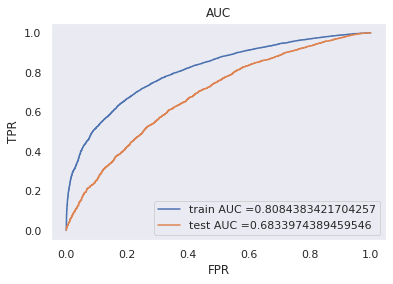

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = LGBMClassifier(learning_rate= learning_rate_2, n_estimators = n_estimators_2, is_unbalance=True)

model.fit(X_tr,y_train)
    
y_train_pred = pred_prob(model,X_tr)
y_test_pred = pred_prob(model,X_te)
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [60]:
#our objective here is to make auc the maximum
#so we find  the best threshold that will give the least fpr
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.539249752976989 for threshold 0.611
Train confusion matrix
[[ 2707   892]
 [ 5619 14232]]


Train data confusion matrix


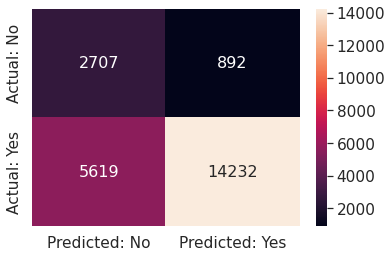

In [61]:

#plotting confusion matrix using seaborn's heatmap
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Train data confusion matrix")
get_ConfusionMatrix(y_train, y_train_pred,best_t)

In [62]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[1046  726]
 [3172 6606]]


Test data confusion matrix


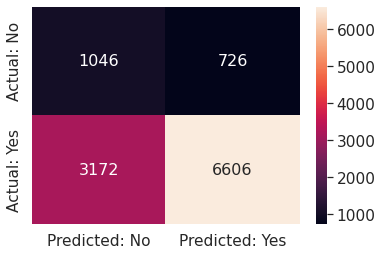

In [63]:
print("Test data confusion matrix")
get_ConfusionMatrix(y_test, y_test_pred,best_t)

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [66]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
#Summary table
sum_tab = PrettyTable()
sum_tab.field_names = ["Vectorizer", "Model", "Hyperparameters(n_estimators,learning_rate)", "Test AUC"]

sum_tab.add_row(["TFIDF", "GBDT", "(0.01, 100)",  0.707])
sum_tab.add_row(["TFIDF W2V", "GBDT", "(0.1, 10)", 0.683])

print(sum_tab)

+------------+-------+---------------------------------------------+----------+
| Vectorizer | Model | Hyperparameters(n_estimators,learning_rate) | Test AUC |
+------------+-------+---------------------------------------------+----------+
|   TFIDF    |  GBDT |                 (0.01, 100)                 |  0.707   |
| TFIDF W2V  |  GBDT |                  (0.1, 10)                  |  0.683   |
+------------+-------+---------------------------------------------+----------+


# Observation:


- From the values, it can be observed that the TFIDF vectorizer provided higher accuracy score compared to the TFIDF W2V vectorizer.

- In addition to the higher accuracy score for the TFIDF vectorizer, it was observed that the model trained with a combination of the lower learning rate and higher number of estimators outperformed the model trained with the same vectorizer but higher learning rate and lower number of estimators. This suggests that when training a GBDT model with the TFIDF vectorizer it is best to set the n_estimators parameter as high as possible while keeping the learning rate low.